In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./Test/107/AE170001/data107old.csv')

# 先查看資料型態

In [3]:
data.head()

,v1,v2,v3,v4,v5,v5a_1,v5a_2,v5a_3,v6,v7,...,v40,v41,v42,v43,v44,v45,v46,v47,wei1,wei2
0,12,640,40,2,2,99,99,99,1,2,...,1,9,2,1,8,3,1,2,0.7768,0.8770
1,13,614,25,5,5,7,99,99,4,2,...,2,2,8,8,1,3,1,1,0.6791,0.5974
2,4,262,41,2,1,99,99,99,1,1,...,1,9,2,1,2,4,1,1,0.9525,0.6488
3,17,906,44,1,3,7,99,99,3,2,...,1,9,1,1,1,5,1,1,1.0841,1.4201
4,10,510,27,5,1,99,99,99,1,2,...,1,9,2,8,4,1,2,2,0.7935,1.4707


# 觀察老人覺得自己快樂人數

In [9]:
data_happy = data[data['v6'] < 3]

In [32]:
happy_people = len(data_happy)
print('happy_people=',happy_people)

happy_people= 1149


In [13]:
data_unhappy = data[(data['v6']>=3) & (data['v6'] != 8) ]

In [33]:
unhappy_people = len(data_unhappy)
print('unhappy_people=',unhappy_people)

unhappy_people= 566


# 查看老人健康和不健康比例

In [15]:
data_health = data[data['v5'] < 3]

In [34]:
health_people = len(data_health)
print('health_people=',health_people)

health_people= 1057


In [17]:
data_unhealth = data[(data['v5'] >=3) & (data['v5'] != 8) ]

In [36]:
unhealth_people = len(data_unhealth)
print('unhealth_people=',unhealth_people)

unhealth_people= 733


# 查看使用網路比例在快樂和不快樂之中

In [19]:
data_int = data[data['v18'] ==1 ]
data_unint = data[data['v18'] !=1 ]

In [37]:
int_people = len(data_int)
print('int_poeple=',int_people)

int_poeple= 628


In [38]:
unint_people = len(data_unint)
print('unint_poeple=',unint_people)

unint_poeple= 1190


# 快樂且有用網路人數

In [24]:
data_happy_int = data_happy[(data_happy['v18']) ==1 ]

In [39]:
happy_int_people = len(data_happy_int)
print('happy_int_people=',happy_int_people)

happy_int_people= 472


# 快樂且沒有用網路人數

In [22]:
data_happy_unint = data_happy[(data_happy['v18']) !=1 ]

In [40]:
happy_unint_people = len(data_happy_unint)
print('happy_unint_people=',happy_unint_people)

happy_unint_people= 677


# 不快樂但有用網路人數

In [26]:
data_unhappy_int = data_unhappy[data_unhappy['v18'] ==1]

In [41]:
unhappy_int_people = len(data_unhappy_int)
print('unhappy_int_people=',unhappy_int_people)

unhappy_int_people= 142


# 不快樂也沒有用網路人數

In [28]:
data_unhappy_unint = data_unhappy[data_unhappy['v18'] !=1]

In [42]:
unhappy_unint_people = len(data_unhappy_unint)
print('unhappy_unint_people=',unhappy_unint_people)

unhappy_unint_people= 424


# 有用網路的人 快樂比率

In [43]:
472/628

0.7515923566878981

# 沒有用網路的人 快樂比率

In [44]:
628/1190

0.5277310924369748

# 不快樂的人之中 上網比率是

In [45]:
142/566

0.2508833922261484

# 健康且有上網人數

In [50]:
data_health_int = data_health[data_health['v18'] ==1]

In [51]:
health_int_people= len(data_health_int)
print('health_int_people=',health_int_people)

health_int_people= 470


# 健康且無上網的人數

In [55]:
data_health_unint = data_health[data_health['v18'] !=1]

In [56]:
health_unint_people= len(data_health_unint)
print('health_unint_people=',health_unint_people)

health_unint_people= 587


# 不健康且有上網人數

In [60]:
data_unhealth_int =data_unhealth[data_unhealth['v18']==1 ] 

In [61]:
unhealth_int_people= len(data_unhealth_int)
print('unhealth_int_people=',unhealth_int_people)

unhealth_int_people= 153


# 不健康且無上網人數

In [57]:
data_unhealth_unint =data_unhealth[data_unhealth['v18']!=1 ] 

In [59]:
unhealth_unint_people= len(data_unhealth_unint)
print('unhealth_unint_people=',unhealth_unint_people)

unhealth_unint_people= 580


# 健康的人上網比率

In [64]:
470/1057

0.4446546830652791

# 不健康的人上網比率

In [65]:
153/733

0.208731241473397

# 上網的人健康比率

In [66]:
470/628

0.7484076433121019

# 不上網的人健康比率

In [67]:
587/1190

0.49327731092436977

In [202]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
train = data[['v4','v5','v6','v7','v17','v18','v40','v47']]

In [75]:
train

,v4,v5,v6,v7,v17,v18,v40,v47
0,2,2,1,2,2,9,1,2
1,5,5,4,2,2,9,2,1
2,2,1,1,1,2,9,1,1
3,1,3,3,2,2,9,1,1
4,5,1,1,2,2,9,1,2
5,6,4,3,2,2,9,2,2
6,1,1,1,1,1,1,1,1
7,2,1,1,1,1,1,2,2
8,2,2,2,2,2,9,1,2
9,2,4,3,2,2,9,1,2


In [78]:
a = train['v5'].replace([1,2],1)
a = a.replace([3,4,5],0)
a = a.replace(8,99)

In [80]:
y_health = a

In [81]:
b = train['v6'].replace([1,2],1)
b = b.replace([3,4,5],0)
b = b.replace(8,99)

In [82]:
y_happy = b

In [83]:
c = train['v7'].replace(2,0)
c = c.replace(8,99)

In [84]:
job = c

In [106]:
internet = train[(train['v17'] ==1) & (train['v18'] ==1 )]
uninternet = train[(train['v17'] ==2 ) | (train['v18'] ==2 ) ] 
missing = train[(train['v17']==8) | (train['v18']==8)]

In [107]:
train['internet'] = train['v4']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
train.at[internet.index,'internet'] = 1

In [109]:
train.at[uninternet.index,'internet'] = 0

In [110]:
train.at[missing.index,'internet'] = 99

In [112]:
internet_ = train['internet']

In [113]:
d = train['v40'].replace(2,0)
d = d.replace(8,99)

In [114]:
e = train['v47'].replace(2,0)

In [182]:
training = pd.concat([train['v4'],a,b,c,d,e,internet_],axis=1)

In [183]:
training

,v4,v5,v6,v7,v40,v47,internet
0,2,1,1,0,1,0,0
1,5,0,0,0,0,1,0
2,2,1,1,1,1,1,0
3,1,0,0,0,1,1,0
4,5,1,1,0,1,0,0
5,6,0,0,0,0,0,0
6,1,1,1,1,1,1,1
7,2,1,1,1,0,0,1
8,2,1,1,0,1,0,0
9,2,0,0,0,1,0,0


In [118]:
training

,v5,v6,v7,v40,v47,internet
0,1,1,0,1,0,0
1,0,0,0,0,1,0
2,1,1,1,1,1,0
3,0,0,0,1,1,0
4,1,1,0,1,0,0
5,0,0,0,0,0,0
6,1,1,1,1,1,1
7,1,1,1,0,0,1
8,1,1,0,1,0,0
9,0,0,0,1,0,0


In [184]:
test = training[training[['v4','v5','v6','v7','v40','v47','internet']] !=99]

In [185]:
Train = test.dropna(axis=0)

In [186]:
y = Train['v5']

In [187]:
len(y)

1679

In [188]:
X = Train.drop('v5',axis=1)
X1 = X.drop('v6',axis=1)

In [189]:
model = sm.Logit(y, X)
 
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.547518
         Iterations 5


In [190]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     v5   No. Observations:                 1679
Model:                          Logit   Df Residuals:                     1673
Method:                           MLE   Df Model:                            5
Date:                Mon, 19 Aug 2019   Pseudo R-squ.:                  0.1823
Time:                        13:21:15   Log-Likelihood:                -919.28
converged:                       True   LL-Null:                       -1124.2
                                        LLR p-value:                 2.160e-86
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
v4            -0.2866      0.029    -10.023      0.000      -0.343      -0.231
v6             1.8165      0.116     15.674      0.000       1.589       2.044
v7             0.2161      0.132      1.642      0.101      -0.042       0.474
v40           -0.2255      0.107     -2.112      0.035      -0.435      -0.016
v47            0.1331      0.114      1.163      0.245      -0.091       0.357
internet       0.4050      0.124      3.269      0.001       0.162       0.648
==============================================================================
"""

In [4]:
q5 = data['v5']
q5 = q5.replace([1,2],0)
q5 = q5.replace([3,4,5],1)
q5 = q5.replace(8,99)
q5 = pd.DataFrame(q5)
q5.columns = ['不健康狀況']

In [5]:
q6 = data['v6']
q6 = q6.replace([1,2],0)
q6 = q6.replace([3,4,5],1)
q6 = q6.replace(8,99)
q6 = pd.DataFrame(q6)
q6.columns = ['不開心狀況']

In [6]:
q1 = data['v1']
q1 = pd.get_dummies(q1,prefix= 'country')   ### defult 宜蘭
q1 = q1.drop('country_4',axis=1)
q1 = pd.DataFrame(q1)
q1.columns = ['彰化縣','雲林縣','嘉義縣','屏東縣','澎湖縣']

In [7]:
q4 = data['v4']
q4 = pd.get_dummies(q4,prefix='age')
q4 = q4.drop('age_1',axis=1)
q4.columns = ['age_65-69','age_70-74','age_75-79','age_80-84','age_85up']

In [8]:
q17 = data['v17']
q17 = q17.replace(2,0)
q17 = q17.replace(8,99)
q17 = pd.DataFrame(q17)
q17.columns = ['是否上網']

In [9]:
q10 = data['v10_1']
q10 = q10.replace([1,6,7,10,11,13,14,15,16,17,18,95,96],0)
q10 = q10.replace([2,3,4,5,8,9,12,19],1)
q10 = q10.replace([98,99],99)
q10 = pd.DataFrame(q10)
q10.columns = ['休閒活動']

In [10]:
q12 = data['v12']
q12 = q12.replace(2,0)
q12 = q12.replace([8,9],99)
q12 = pd.DataFrame(q12)
q12.columns = ['使用手機']

In [11]:
q40 = data['v40']
q40 = q40.replace(2,0)
q40 = q40.replace(8,99)
q40 = pd.DataFrame(q40)
q40.columns = ['與兒孫同住']

In [12]:
q45 = data['v45']
q45 = q45.replace([98,99],99)  ### 把自修這個列為遺漏值???
q45 = pd.get_dummies(q45,prefix='edu')
q45['edu_99'] = q45['edu_99'].replace(1,99)
q45 = q45.drop('edu_1',axis=1)
q45.columns = ['自修','小學','國中','高中','專科','大學','研究所','edu_99']

In [13]:
q46 = data['v46']
q46 = q46.replace([2,3,4],0)
q46 = q46.replace(98,99)
q46 = pd.DataFrame(q46)
q46.columns = ['有配偶或同居']

In [14]:
q47 = data['v47']
q47 = q47.replace(2,0)  ### girl is 0 
q47 = pd.DataFrame(q47)
q47.columns = ['性別']

In [15]:
dummies_data = pd.concat([q1,q4,q5,q6,q10,q12,q17,q40,q45,q46,q47],axis=1)

In [16]:
dummies_data = dummies_data[dummies_data != 99]
dummies_data = dummies_data.dropna(axis=0)
dummies_data = dummies_data.drop('edu_99',axis=1)

In [17]:
dummies_data.describe()

,彰化縣,雲林縣,嘉義縣,屏東縣,澎湖縣,age_65-69,age_70-74,age_75-79,age_80-84,age_85up,...,與兒孫同住,自修,小學,國中,高中,專科,大學,研究所,有配偶或同居,性別
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,...,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,0.163129,0.163736,0.166768,0.167981,0.166768,0.241358,0.147968,0.152213,0.111583,0.055791,...,0.561552,0.010916,0.359005,0.134627,0.183748,0.057004,0.057611,0.014554,0.689509,0.456640
std,0.369596,0.370148,0.372881,0.373962,0.372881,0.428037,0.355176,0.359337,0.314948,0.229588,...,0.496347,0.103938,0.479854,0.341428,0.387396,0.231921,0.233076,0.119796,0.462835,0.498268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


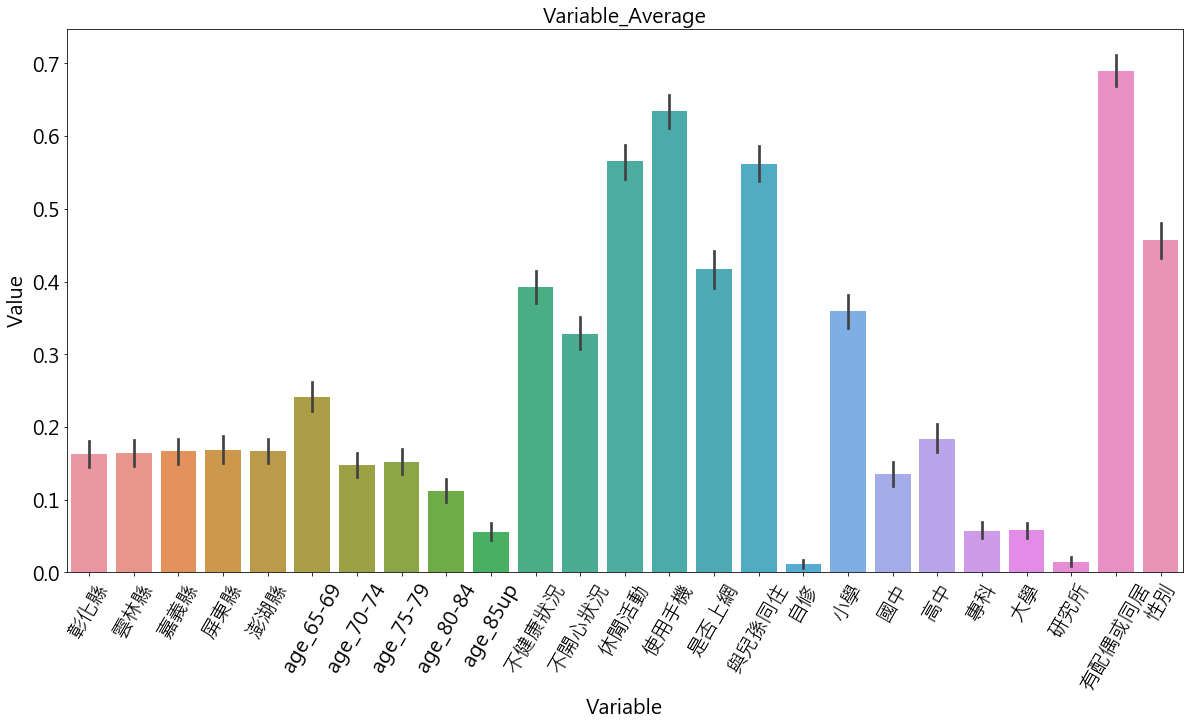

In [18]:
#find  matplotlib default font
from matplotlib.font_manager import findfont, FontProperties  
findfont(FontProperties(family=FontProperties().get_family())) 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False


fig = plt.figure(figsize=(20,10))
ax = plt.subplot()
sns.barplot(data = dummies_data,ax=ax)
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=20)
plt.xlabel('Variable',fontsize= 20)
plt.ylabel('Value',fontsize=20)
plt.title('Variable_Average',fontsize=20)

plt.savefig('variable.jpg')

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
X = dummies_data.drop('不開心狀況',axis=1)
X1 = X.drop('不健康狀況',axis=1)
X2 = dummies_data.drop('不健康狀況',axis=1)
y1 = dummies_data['不開心狀況']
y2 = dummies_data['不健康狀況']

In [21]:
model = sm.Logit(y2, X1)
 
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.610354
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  不健康狀況   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1626
Method:                           MLE   Df Model:                           22
Date:                Tue, 27 Aug 2019   Pseudo R-squ.:                 0.08874
Time:                        11:06:30   Log-Likelihood:                -1006.5
converged:                       True   LL-Null:                       -1104.5
Covariance Type:            nonrobust   LLR p-value:                 6.807e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
彰化縣           -0.0284      0.169     -0.168      0.867      -0.360       0.303
雲林縣            0.3552      0.166      2.135      0.033       0.029       0.681
嘉義縣            0.3105      0.167      1.864      0.062      -0.016       0.637
屏東縣           -0.2403      0.178     -1.348      0.178      -0.590       0.109
澎湖縣           -0.1630      0.174     -0.938      0.348      -0.503       0.177
age_65-69     -0.1620      0.148     -1.098      0.272      -0.451       0.127
age_70-74      0.3844      0.162      2.366      0.018       0.066       0.703
age_75-79      0.4678      0.158      2.954      0.003       0.157       0.778
age_80-84      0.4785      0.181      2.647      0.008       0.124       0.833
age_85up       0.6040      0.236      2.556      0.011       0.141       1.067
休閒活動          -0.1189      0.110     -1.081      0.280      -0.335       0.097
使用手機          -0.2481      0.134     -1.847      0.065      -0.511       0.015
是否上網          -0.1987      0.151     -1.319      0.187      -0.494       0.097
與兒孫同住         -0.0255      0.106     -0.240      0.810      -0.234       0.183
自修            -0.8355      0.527     -1.584      0.113      -1.869       0.198
小學             0.0767      0.149      0.515      0.607      -0.215       0.369
國中            -0.5238      0.208     -2.520      0.012      -0.931      -0.116
高中            -0.5597      0.204     -2.742      0.006      -0.960      -0.160
專科            -1.0904      0.326     -3.348      0.001      -1.729      -0.452
大學            -0.5163      0.294     -1.756      0.079      -1.093       0.060
研究所           -1.4271      0.652     -2.190      0.029      -2.704      -0.150
有配偶或同居        -0.2605      0.117     -2.225      0.026      -0.490      -0.031
性別             0.0988      0.118      0.835      0.404      -0.133       0.331
==============================================================================
"""

In [26]:
dummies_data.describe().to_csv('describe.csv',encoding='utf_8_sig')

In [27]:
dummies_data.to_csv('clean_data.csv',encoding='utf_8_sig')

In [28]:
小學以下一組
國中一處
高中一組
專科大學以上一組

Q10多弄一些百分之10以上就可以弄一個

有無工作要建立



NameError: name '小學以下一組' is not defined

In [32]:
from keras.data_set import MNST

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
import